# 과적합, 분산 편향 트레이드오프, 교차 검증

In [1]:
#필요한 라이브러리 임포트

import numpy as np
import pandas as pd

# 교차검증

## 1. 사이킷런의 model_selection의 KFold()를 사용하는 경우(For loop 사용)

#### 폴드를 분리할 객체 생성

In [2]:
from sklearn.model_selection import KFold

#### 데이터를 준비하고 회귀 모형 객체를 생성

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression

diab = load_diabetes()

x = diab.data
y = diab.target

In [6]:
x[:5] , y[:5]

(array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
         -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
         -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
         -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
        [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
          0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
        [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
          0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]]),
 array([151.,  75., 141., 206., 135.]))

In [7]:
len(x)

442

#### split()함수를 호출하여 폴드별로 분리될 행 인덱스 세트를 구함

In [8]:
kfold = KFold(5)

list(kfold.split(x))

[(array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
         102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
         115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
         128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
         141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
         154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
         167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
         180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
         193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
         206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
         219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231,
         232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244,
         245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
         258, 259, 260, 261, 262, 263,

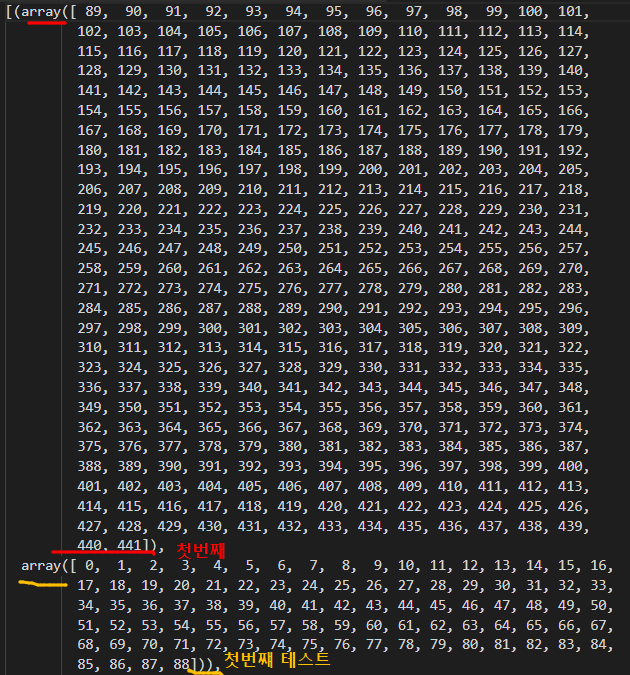

In [12]:
from sklearn.metrics import r2_score

r2_scores = []

lr = LinearRegression()

for train_idx, test_idx in kfold.split(x):
    x_train = x[train_idx]
    x_test = x[test_idx]
    y_train = y[train_idx]
    y_test = y[test_idx]

    reg = lr.fit(x_train,y_train)
    y_pred = reg.predict(x_test)

    r2 = r2_score(y_test,y_pred)
    r2_scores.append(r2)

In [14]:
r2_scores

[0.4295561538258379,
 0.5225993866099365,
 0.4826805413452824,
 0.42649776111040205,
 0.5502483366517519]

In [19]:
import numpy as np

for i, r2 in enumerate(r2_scores):
    print(i+1, f'- R2 = {r2:.3f}')


print(f'average R2 = {np.round(np.mean(r2_scores),3)}')

1 - R2 = 0.430
2 - R2 = 0.523
3 - R2 = 0.483
4 - R2 = 0.426
5 - R2 = 0.550
average R2 = 0.482


In [20]:
np.round(np.mean(r2_scores),3)

0.482

## 2. 사이킷런의 cross_val_score 함수를 사용하여 K폴드 교차 검증 수행 without shuffling:
- for loop 필요 없음

In [22]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


diab = load_diabetes()
x = diab.data
y = diab.target

lr = LinearRegression()

np.round(np.mean(cross_val_score(lr,x,y,cv=5)),3)

0.482

In [26]:
from sklearn.datasets import load_iris
import pandas as pd 

iris = load_iris()
x = iris.data
y = iris.target

iris_df = pd.DataFrame(x,columns=iris.feature_names)
iris_df['kind'] = iris.target
iris_df.kind

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: kind, Length: 150, dtype: int32

## 3. 사이킷런의 cross_val_score 함수를 사용하여 K폴드 교차 검증 수행 with shuffling

In [27]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

diab = load_diabetes()
x = diab.data
y = diab.target

# stratify=True
kfold = KFold(5,shuffle=True,random_state=29)
lr = LinearRegression()

np.round(np.mean(cross_val_score(lr,x,y,cv=kfold)),3)

0.489